In [1]:
import pandas as pd
import geopandas as gpd
#should I just get internet by zip codes then? might be more compatible but census tract is more granular. Also, if hospitals are just point data, it should not be a big deal.
#illinois_internet_shape = gpd.read_file("C:/Users/natha/OneDrive/Documents/nhgis0010_shape/nhgis0010_shape/nhgis0010_shapefile_tl2021_us_tract_2021/US_tract_2021.shp")
#illinois_internet_csv = pd.read_csv("C:/Users/natha/nhgis0010_ds254_20215_tract_corrected.csv", usecols = ['GISJOIN', 'STATE', 'COUNTY','TRACTA', 'GEO_ID', 'AOU2E001', 'AOU2E013'],encoding='latin1')
#illinois_internet_excel = pd.read_excel("C:/Users/natha/OneDrive/Documents/simplified data.xlsx")
#pd.read_csv(filename, usecols = [])
#illinois_internet = illinois_internet_shape.merge(illinois_internet_csv, on = 'GISJOIN')
#cookcountyinternet = illinois_internet[illinois_internet.STATE == 'Illinois']
#cookcountyinternet = cookcountyinternet[cookcountyinternet.COUNTY == 'Cook County']
#cookcountyinternet.to_file('C:\\Users\\natha\\OneDrive\\Documents\\cookcountyinternet.shp')
cookcountyinternet = gpd.read_file('C:\\Users\\natha\\OneDrive\\Documents\\cookcountyinternet.shp')
cookcountyinternet['normal'] = cookcountyinternet['AOU2E013']/cookcountyinternet['AOU2E001']
#providerdata = pd.read_csv("C:/Users/natha/OneDrive/Documents/npidata_pfile_20230306-20230312.csv", low_memory=False)
#providerdata = providerdata[providerdata['Provider Business Practice Location Address State Name'] == 'IL']
#providerdata.to_csv('C:\\Users\\natha\\OneDrive\\Documents\\providerdata.csv')

C:\Users\natha\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\natha\AppData\Local\Temp\ipykernel_18748\4167287766.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/

In [2]:
import requests
import json

illinoiszipcodes = pd.read_excel("C:/Users/natha/OneDrive/Documents/zip codes in cook county.xlsx").astype(str)
providerdata = pd.read_csv('C:\\Users\\natha\\OneDrive\\Documents\\providerdata.csv')
providerdataslim = providerdata[['NPI', 'Entity Type Code', 'Provider Credential Text', 'Provider First Line Business Practice Location Address', 'Provider Second Line Business Practice Location Address', 'Provider Business Practice Location Address City Name', 'Provider Business Practice Location Address State Name', 'Provider Business Practice Location Address Postal Code']]
providerdataslim = providerdataslim.rename(columns={'Provider First Line Business Practice Location Address': 'address_line_one', 'Provider Second Line Business Practice Location Address': 'address_line_two', 'Provider Business Practice Location Address City Name': 'city', 'Provider Business Practice Location Address State Name': 'state', 'Provider Business Practice Location Address Postal Code': 'zip_code'})
idx = 0
providerdataslim['fivedigitzip'] = ''
s1 = slice(5)
while idx < len(providerdataslim):
    if len(str(providerdataslim['zip_code'][idx])) == 9:
        providerdataslim['fivedigitzip'][idx] = str(providerdataslim['zip_code'][idx])[s1]
    else:
        providerdataslim['fivedigitzip'][idx] = str(providerdataslim['zip_code'][idx])
    idx += 1
providers = providerdataslim[providerdataslim.fivedigitzip.isin(illinoiszipcodes.ZIP)]
print(providers)


C:\Users\natha\AppData\Local\Temp\ipykernel_18748\3588994677.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  providerdataslim['fivedigitzip'][idx] = str(providerdataslim['zip_code'][idx])[s1]
C:\Users\natha\AppData\Local\Temp\ipykernel_18748\3588994677.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  providerdataslim['fivedigitzip'][idx] = str(providerdataslim['zip_code'][idx])


             NPI  Entity Type Code Provider Credential Text  \
0     1205534765               2.0                      NaN   
2     1245930734               1.0                     LCPC   
4     1114627601               1.0                       PA   
5     1205446358               1.0                       OD   
11    1932809431               1.0                      NaN   
...          ...               ...                      ...   
1445  1174926497               1.0                      DPT   
1446  1619611902               2.0                      NaN   
1448  1427782770               1.0                      LPC   
1449  1427763507               2.0                      NaN   
1450  1316696222               2.0                      NaN   

                 address_line_one       address_line_two        city state  \
0              1430 S ASHLAND AVE                    NaN     CHICAGO    IL   
2     2650 W MONTROSE AVE STE 102                    NaN     CHICAGO    IL   
4        

In [3]:
#open, then geocode
import fiona

providers['fullAddress'] = providers.address_line_one + ' ' + providers.city + ' ' + providers.state + ' ' + providers.fivedigitzip
    #listofsites = listofsites.append(jsonData)
#mydata = pd.DataFrame(data=listofsites)
#geocoded = gpd.tools.geocode(providers['fullAddress'],provider='nominatim', user_agent="test",timeout=None)
#geocoded.to_file('C:\\Users\\natha\\OneDrive\\Documents\\geocoded_table.csv')
#geocoded.to_file('C:\\Users\\natha\\OneDrive\\Documents\\geocoded_shape.shp')
geocoded = gpd.read_file('C:\\Users\\natha\\OneDrive\\Documents\\geocoded_shape.shp')
geocoded.head()

C:\Users\natha\AppData\Local\Temp\ipykernel_18748\2488319257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  providers['fullAddress'] = providers.address_line_one + ' ' + providers.city + ' ' + providers.state + ' ' + providers.fivedigitzip


,address,geometry
0,"Costco, 1430, South Ashland Avenue, Near West ...",POINT (-87.66778 41.86204)
1,None,None
2,None,None
3,"Costco, 1430, South Ashland Avenue, Near West ...",POINT (-87.66778 41.86204)
4,"1123, Fortuna Avenue, Park Ridge, Maine Townsh...",POINT (-87.85361 42.02683)


In [4]:
geocoded[geocoded.address.isnull()]

,address,geometry
1,None,None
2,None,None
5,None,None
6,None,None
12,None,None
...,...,...
406,None,None
407,None,None
408,None,None
409,None,None


In [5]:
providers['fullAddress']

0                1430 S ASHLAND AVE CHICAGO IL 60608
2       2650 W MONTROSE AVE STE 102 CHICAGO IL 60618
4            333 S STATE ST STE 200 CHICAGO IL 60604
5         1430 SOUTH ASHLAND AVENUE CHICAGO IL 60608
11              1123 FORTUNA AVE PARK RIDGE IL 60068
                            ...                     
1445    2000 N RACINE AVE STE 1000B CHICAGO IL 60614
1446     1507 N MILWAUKEE AVE APT 3 CHICAGO IL 60622
1448        3411 N ALBANY AVE APT 2 CHICAGO IL 60618
1449      4920 N CENTRAL AVE STE 1A CHICAGO IL 60630
1450    2000 N RACINE AVE STE 1000B CHICAGO IL 60614
Name: fullAddress, Length: 411, dtype: object

C:\Users\natha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


<Axes: >

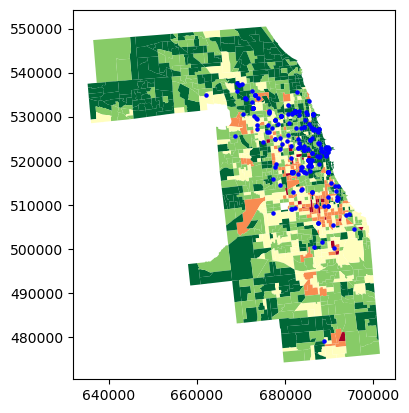

In [6]:
geocode=geocoded.to_crs(cookcountyinternet.crs)
geocode=geocode[~geocode.address.isnull()]
ax = cookcountyinternet.plot('normal', cmap = 'RdYlGn_r', scheme='natural_breaks')
geocode.plot(marker='o', color='blue', markersize = 5, ax=ax)

In [7]:
geocoded[~geocoded.address.isnull()].total_bounds

array([-87.9392322,  41.5062869, -87.5662784,  42.0434168])

In [8]:
from geopandas import GeoDataFrame

total = cookcountyinternet.sjoin(geocode, how = 'left', predicate = 'contains')
cookcountyinternet.head()
total2 = total.groupby('GEOID').count()
total2 = total2[['address']].rename(columns = {'address':'count'})
mergedframe = total2.merge(total, how = 'left', left_on='GEOID', right_on='GEOID')
mergedframe = mergedframe[['GEOID', 'count', 'NAMELSAD', 'AOU2E001', 'AOU2E013', 'geometry', 'normal']]
mergedframegeo = GeoDataFrame(mergedframe, crs='EPSG:4326', geometry='geometry')
idx = 0
mergedframe = mergedframe.drop_duplicates()

In [9]:
'''fivetwelve = cookcountyinternet[cookcountyinternet.NAMELSAD == 'Census Tract 512']
hospitalsfivetwelve = geocode[geocode.within(fivetwelve.geometry.values[0])]
print(hospitalsfivetwelve['address'])'''

"fivetwelve = cookcountyinternet[cookcountyinternet.NAMELSAD == 'Census Tract 512']\nhospitalsfivetwelve = geocode[geocode.within(fivetwelve.geometry.values[0])]\nprint(hospitalsfivetwelve['address'])"

In [10]:
#how do I do this with going through each geometry? (also, try group by in the line above
#will it label one geometry one and the other geometry two? does it pick a geometry?

import numpy as np
import statsmodels.api as sm
frameforreg = mergedframe[['normal', 'count']]
frameforreg = frameforreg[~frameforreg.normal.isnull()]



In [11]:
arraysforreg = frameforreg.to_numpy()

normarray = np.zeros(shape=len(arraysforreg))
countarray = np.zeros(shape=len(arraysforreg))
idx = 0
while idx < len(normarray):
    normarray[idx] = arraysforreg[idx][0]
    idx +=1
idx = 0
while idx < len(countarray):
    countarray[idx] = arraysforreg[idx][1]
    idx += 1
y = countarray
x = normarray
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit(cov_type = 'HC3')
results2 = model.fit()
print(results.summary())
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05754
Date:                Sat, 06 May 2023   Prob (F-statistic):              0.810
Time:                        17:54:16   Log-Likelihood:                -2511.9
No. Observations:                1328   AIC:                             5028.
Df Residuals:                    1326   BIC:                             5038.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1978      0.045      4.441      0.0

C:\Users\natha\AppData\Roaming\Python\Python310\site-packages\spaghetti\network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


0.48355737257333853
0.001
0.02533099592535878
0.038


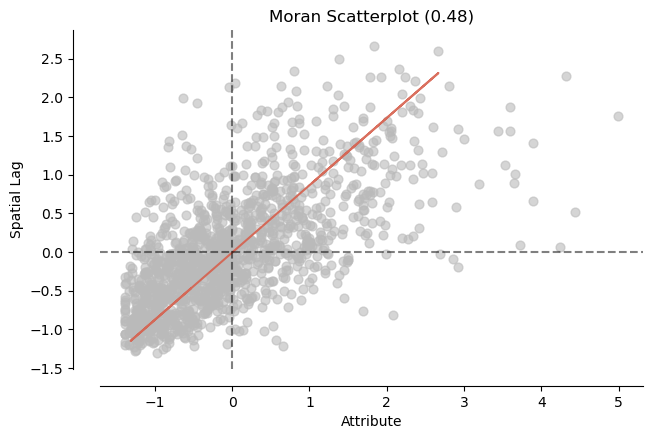

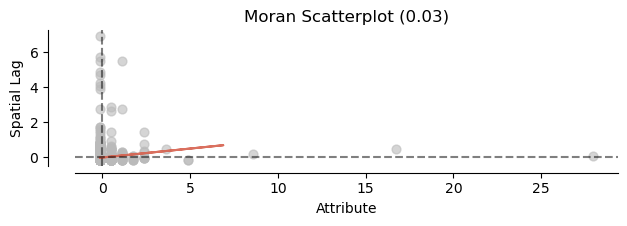

In [12]:
from pysal.lib import weights
from splot.esda import moran_scatterplot,lisa_cluster
from pysal.explore import esda
import matplotlib.pyplot as plt

cookcountyinternet_ac = cookcountyinternet[~cookcountyinternet.normal.isnull()]
rook_internet = weights.Rook.from_dataframe(cookcountyinternet_ac,idVariable="GISJOIN")
rook_internet.transform = 'R'
morans = esda.Moran(cookcountyinternet_ac['normal'], rook_internet)
moran_scatterplot(morans);
moransIinternet = morans.I
moransIinternetpvalue = morans.p_sim
print(moransIinternet)
print(moransIinternetpvalue)

mergedframegeo_ac = mergedframegeo.drop_duplicates()
rook_provider = weights.Rook.from_dataframe(mergedframegeo_ac,idVariable="GEOID")
rook_provider.transform = 'R'
morans1 = esda.Moran(mergedframegeo_ac['count'], rook_provider)
moran_scatterplot(morans1);
moransIprovider = morans1.I
moransIproviderpvalue = morans1.p_sim
print(moransIprovider)
print(moransIproviderpvalue)

In [13]:
import ipywidgets as widgets
from IPython.display import display
#ax = cookcountyinternet.plot('normal', cmap = 'RdYlGn_r', scheme='natural_breaks')
def selection(change):
    if change['new'] == 'Internet':
        cookcountyinternet.plot('AOU2E013', cmap = 'RdYlGn_r', scheme='natural_breaks', legend = True)
    if change['new'] == 'Internet Normalized by Population':
        cookcountyinternet.plot('normal', cmap = 'RdYlGn_r', scheme='natural_breaks', legend = True)
    if change['new'] == 'Internet and Providers':
        ax = cookcountyinternet.plot('normal', cmap = 'RdYlGn_r', scheme='natural_breaks', legend = True)
        geocode[~geocode.address.isnull()].plot(marker='o', color='blue', markersize = 1, ax = ax, legend = True)
    if change['new'] == 'Internet Spatial Autocorrelation':
        moran_scatterplot(morans);
        print('Morans I = ' + str(moransIinternet))
        print('p-value = ' + str(moransIinternetpvalue))
    if change['new'] == 'Providers Spatial Autocorrelation':
        moran_scatterplot(morans1);
        print('Morans I = ' + str(moransIprovider))
        print('p-value = ' + str(moransIproviderpvalue))
    if change['new'] == 'Providers':
        mergedframegeo.plot('count', cmap = 'Reds', scheme = 'natural_breaks', legend = True)
    if change['new'] == 'Regression Results':
        print(results.summary())
        

final = widgets.RadioButtons(
    options=['Internet and Providers', 'Internet Normalized by Population', 'Internet', 'Internet Spatial Autocorrelation', 'Providers', 'Providers Spatial Autocorrelation', 'Regression Results'],
    value=None,
    layout={'width': 'max-content'},
    description='Display:',
    disabled=False
)
final.observe(selection,names='value')
final

RadioButtons(description='Display:', layout=Layout(width='max-content'), options=('Internet and Providers', 'I…